# Preprocessing Structured Data

Before we actually feed the data into any deep learning system we should look through it carefully. In addition to the kinds of big-picture problems that might arise in collecting data from a noisy world, we need to look out for missing values, strange outliers, and potential errors in the data. The data doesn't have to be completely error free, although obviously that would be best. Frequently, with the size of data we're dealing with, it is not realistic to completely scrub the data of any errors. 

Once we have a collection of data that has a tolerable amount of errors (ideally error free, though that does not HAVE to be the case) we have to transform it into a deep learning friendly format. There are a number of tricks that machine learning practitioners apply to get better results from the same data.

It's also wise to explore the data and look for interesting outliers, correlation between different parts of the data, and other anomolies, oddities, and trends. Of course, we're hoping that our deep learning system can tease these out even better than we could—but that's not a good reason to shirk your own responsibility to understand the dataset. Sophisticated as they are, neural nets are still just tools, and understanding the data can help use hone our tools in the areas where they'll be most successful. 

For this lab we're going to use a public domain dataset from Kaggle. You can find the dataset here:

https://www.kaggle.com/new-york-city/nyc-property-sales

To run this code you'll need to download and unzip that data.

There is useful supporting information about this dataset as well at the following two URLs:

https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html

The dataset is a record of every building/condo/appartment that was sold in New York City over a 12 month period.

In [1]:
# Pandas is a fantastic and powerful tool for working with structured data
# it's the best of spreadsheets + python, and it has quickly become a go to
# library for data scientists in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your path may vary, change this appropriately
path_to_ny_sales = 'datasets/nyc-rolling-sales.csv'

# One of the things we love about pandas is that it's easy to load CSV data
# into a "data frame"
sales_df = pd.read_csv(path_to_ny_sales)

# And, it makes it easy to take a look at the first n items:
sales_df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [2]:
# And a summary with bundles of useful information on the numerical fields
sales_df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [3]:
sales_df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [4]:
# The first two columns are ... kind of irrelelvant. The first is just the index for the data
# the second is named 'Unnamed: 0' which doesn't sound important. Lets look at it anyway: 

# We can check if there is ever a duplicate value in that column:
print(any(sales_df['Unnamed: 0'].duplicated()))

# And we can see which ones. This syntax often confuses Pandas newbs
# .duplicated() returns a parallel dataframe with one column set to
# True if the value in the 'Unnamed: 0' column is duplicated, false otherwise
# for every entry in the dataframe. Using the == comparison operator like this
# within the [] of a dataframe access acts as a filter.
multi_sale_units = sales_df[sales_df['Unnamed: 0'].duplicated() == True]

multi_sale_units

True


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18306,4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,,A1,4455 PARK AVENUE,...,1,0,1,1622,1587,1899,1,A1,140000,2017-05-12 00:00:00
18307,5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3036,13,,A1,4348 PARK AVENUE,...,1,0,1,3525,1764,1899,1,A1,420000,2017-02-03 00:00:00
18308,6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043,55,,A1,1948 BATHGATE AVENUE,...,1,0,1,2356,2047,1901,1,A1,127000,2017-08-22 00:00:00
18309,7,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,0,1,2329,1431,1901,1,A1,273796,2016-09-21 00:00:00
18310,8,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,0,1,2329,1431,1901,1,A1,231244,2016-09-21 00:00:00
18311,9,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3048,27,,A1,538 EAST 182 STREET,...,1,0,1,1209,1048,1901,1,A1,0,2016-09-20 00:00:00
18312,10,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3048,28,,A1,540 EAST 182 STREET,...,1,0,1,1209,1048,1901,1,A1,290000,2016-09-27 00:00:00
18313,11,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,105,,A1,2323 BASSFORD AVENUE,...,1,0,1,922,1248,1901,1,A1,0,2017-03-16 00:00:00
18314,12,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,151,,B1,519 EAST 171 STREET,...,2,0,2,2000,2400,1993,1,B1,0,2016-10-24 00:00:00
18315,13,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2929,128,,B1,559 CLAREMONT PARKWAY,...,2,0,2,2361,2394,1995,1,B1,0,2017-05-04 00:00:00


In [5]:
# So there were ~84,500 sales records, and 57,812 records where the 'Unnamed: 0' appeared 
# in more than one record. Lets look at ONE such value:
building_8413_records = sales_df[sales_df['Unnamed: 0'] == 8413]

building_8413_records

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
8409,8413,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1338,1092,,R4,301 EAST 45TH STREET,...,1,0,1,-,-,1980,2,R4,965000,2017-06-16 00:00:00
33764,8413,3,CONEY ISLAND,02 TWO FAMILY DWELLINGS,1,7019,86,,B1,2811 WEST 20TH STREET,...,2,0,2,1000,1400,1901,1,B1,0,2016-10-05 00:00:00
57811,8413,4,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,4409,1011,,R4,136-16 31ST ROAD,...,1,0,1,-,-,2008,2,R4,559000,2016-10-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


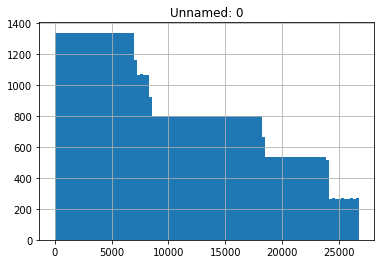

In [6]:
# Well... the duplicate values suggest it's not an ID, my first hypothosis. Lets plot a histogram
# and see if it's revealing.
sales_df.hist(column='Unnamed: 0', bins=100)
plt.show()

In [7]:
# weird. The data is undocumented, and has a strange distribution.
# Lets see if it correlates with anything?
sales_df.corrwith(sales_df['Unnamed: 0'])

Unnamed: 0                   1.000000
BOROUGH                      0.088817
BLOCK                        0.264130
LOT                         -0.031601
ZIP CODE                     0.166882
RESIDENTIAL UNITS           -0.013318
COMMERCIAL UNITS            -0.002821
TOTAL UNITS                 -0.012856
YEAR BUILT                  -0.004057
TAX CLASS AT TIME OF SALE    0.017395
dtype: float64

In [8]:
# There is a very weak correlation with block and zip code... which is spurrious because those are both
# actually categorical columns, not numerical columns. Lets see if it has any correlation with what we
# CARE about specifically:
sales_df['SALE PRICE'].corr(sales_df['Unnamed: 0'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [10]:
# Uh oh — looks like we've got some problems in our sale amount data...
# Lets take a look:
sales_df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
5             -  
6         3192840
7             -  
8             -  
9        16232000
10            -  
11       10350000
12              1
13         499000
14             10
15         529500
16         423000
17         501000
18         450000
19         510000
20            -  
21         350000
22       11900000
23       11900000
24         350000
25         404000
26         535000
27        1400000
28         866000
29         355000
           ...   
84518      875000
84519      875000
84520      840000
84521      772500
84522      740000
84523         -  
84524         -  
84525         -  
84526      590000
84527      580000
84528      550000
84529      545000
84530      800000
84531      642500
84532      408092
84533      600000
84534      610000
84535      645000
84536      168000
84537      625000
84538         -  
84539         -  
84540      509000
84541      648000
84542     

In [12]:
# Looks like the data is a string type, and sometimes has a value of -
# The documentation suggests the - value means that there was no sale
# just a property transfer for nothing, such as an inheritance. 
# Lets try to coerce the data to numeric where possible:
coerced_sales = pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')

# Ignore doesn't convert values that cannot be coerced. We can use this code to 
# Examine those values:
only_non_numerics = sales_df['SALE PRICE'][coerced_sales.isna()]

# And this to print all the unique values from only_non_numerics
only_non_numerics.unique()

array([' -  '], dtype=object)

In [13]:
# So, indeed, the only value that wasn't a number as a string was the ' - ' value. 
# good to know. Lets go ahead and coerce them all
sales_df['SALE PRICE'] = pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].fillna(0)

In [14]:
# Now we should be able to check the correlation we wanted to originally:
sales_df['SALE PRICE'].corr(sales_df['Unnamed: 0'])

-0.01550875289804219

In [15]:
# So... I'm going to go out on a limb and say 'Unnamed: 0' is a junk column. Lets delete it
# along with a few others that we don't want to use.
sales_df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [16]:
sales_df = sales_df.drop(columns=[
    'Unnamed: 0',
    'ADDRESS',          # Hard to parse. Block/zip/borough/neighborhood capture all the value we need. 
    'APARTMENT NUMBER', # Likely irrelevent to the price. Ought to be categorical, which would make data large.
    'SALE DATE',        # Everything was within a 12 month period, likely irrelevant and hard to parse.
    'LOT'               # A lot is a unique identified within a block, and categorical. Not worth it. 
])

# Look again with dropped columns
sales_df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,28,3,31,4616,18690,1900,2,C7,0.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,16,1,17,2212,7803,1900,2,C7,0.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000.0


In [17]:
sales_df.describe()

,BOROUGH,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,2.998758,4237.218976,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,1.056623e+06
std,1.289790,3568.263407,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,1.038794e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,3.000000,3311.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,4.000000,6281.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,5.000000,16322.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


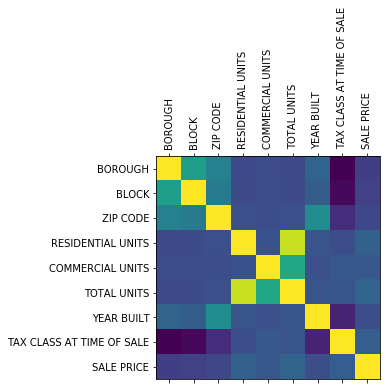

In [22]:
# One really cool and helpful thing we can do in pandas is checkout the correlation matrix:
correlation_matrix = sales_df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical');
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns);
plt.show()

In [23]:
# We can see that everything perfectly correlates with itself, obviously. 
# Some of this is still spurious, since for example ZIP CODE seems to correlate
# weakly with SALE PRICE But it's actually a categorical value, not a numeric one. 

# Lets inform pandas that these values ought to be considered categorical.
categorical_columns = [
    'BOROUGH',
    'BLOCK',
    'ZIP CODE',
    'TAX CLASS AT TIME OF SALE'
]

for c in categorical_columns:
    sales_df[c] = sales_df[c].astype('category')

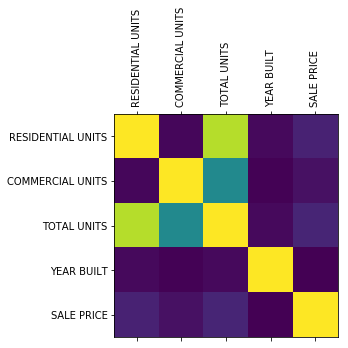

In [24]:
# Try the matrix again:
correlation_matrix = sales_df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical');
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns);
plt.show()

In [26]:
# Not surprising that total units seems to correlate most with price. 
# Interesting that residential units seems more correlated than commercial

# What haven't we looked at...
sales_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

In [29]:
sales_df['EASE-MENT'].unique()

array([' '], dtype=object)

In [30]:
# It only has one value, junk it. 
sales_df = sales_df.drop(columns=['EASE-MENT'])

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,10009,28,3,31,4616,18690,1900,2,C7,0.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,10009,16,1,17,2212,7803,1900,2,C7,0.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000.0
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,C4,10009,20,0,20,2581,9730,1900,2,C4,0.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,C4,10009,8,0,8,1750,4226,1920,2,C4,3192840.0
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,C7,10009,44,2,46,5163,21007,1900,2,C7,0.0
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,D5,10009,15,0,15,1534,9198,1920,2,D5,0.0
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,D9,10009,24,0,24,4489,18523,1920,2,D9,16232000.0


There are a few things we never had to do with this dataset, including imputing values (where we make an educated guess for missing values). It's common to use the mean or some other value, esp. when it's not critical that the exactly correct value be there.

**If we had missing values in LAND SQUARE FEET, would you impute a value? If so, how would you decide what value to use?** 

**Same question for any of the 3 UNITS columns, and YEAR BUILT?**

**What about SALE PRICE?**



BOROUGH category
NEIGHBORHOOD object
BUILDING CLASS CATEGORY object
TAX CLASS AT PRESENT object
BLOCK category
EASE-MENT object
BUILDING CLASS AT PRESENT object
ZIP CODE category
RESIDENTIAL UNITS int64


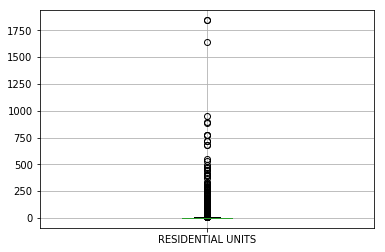

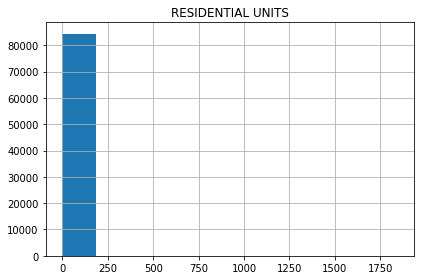

COMMERCIAL UNITS int64


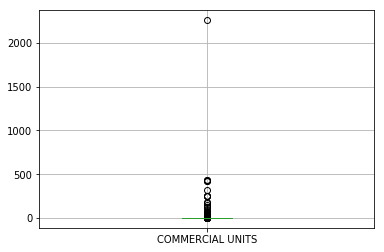

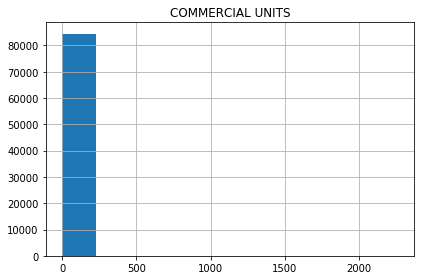

TOTAL UNITS int64


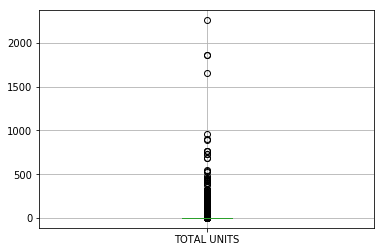

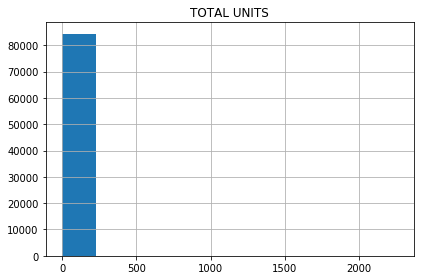

LAND SQUARE FEET object
GROSS SQUARE FEET object
YEAR BUILT int64


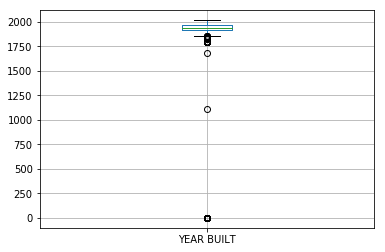

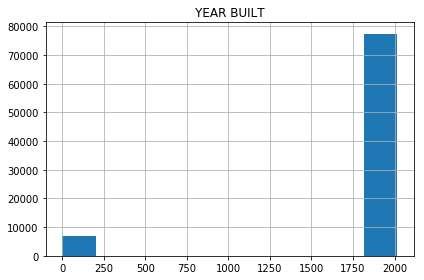

TAX CLASS AT TIME OF SALE category
BUILDING CLASS AT TIME OF SALE object
SALE PRICE float64


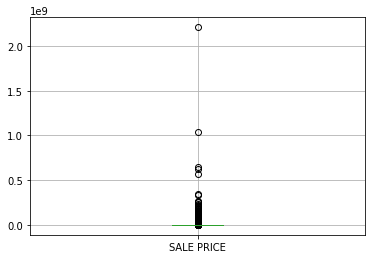

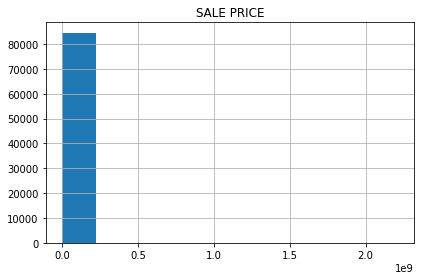

In [38]:
# Lets plot two interesting charts:
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    if dtype not in ['float', 'int', 'float64', 'int64']: continue

    print(col)
    sales_df.boxplot(column=[col])
    sales_df.hist(column=[col])

    plt.tight_layout()
    plt.show()

Something to note about these charts is that, all of our numerical data seems to have a handful of extreme outliers. This might not be a challenge, because they are likely correlated. As in, the building with 1000+ units is probably also one of the sale price outliers. But it does sort of make the histograms unhelpful. 

We could consider pruning these outliers before going ahead with the rest of this data processing. Lets use some rough and tumble outlier detection code from Stack Overflow and replot.

RESIDENTIAL UNITS


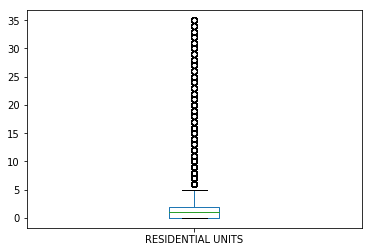

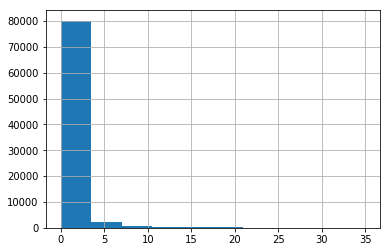

COMMERCIAL UNITS


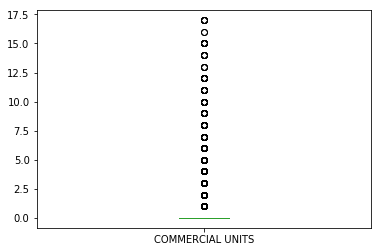

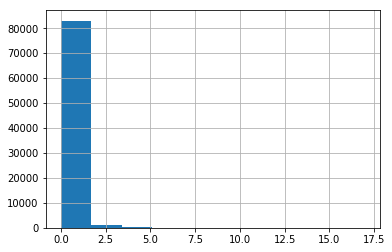

TOTAL UNITS


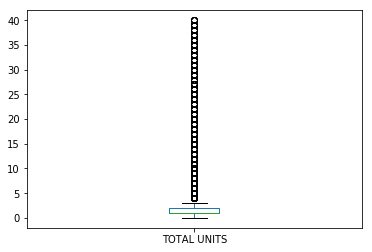

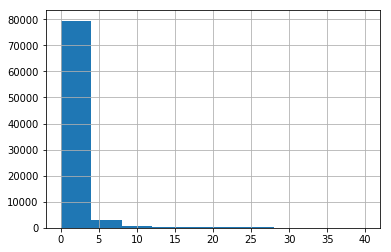

YEAR BUILT


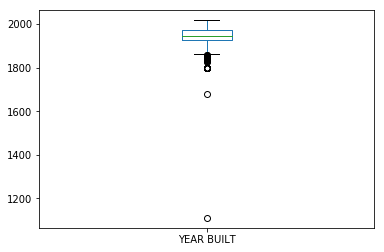

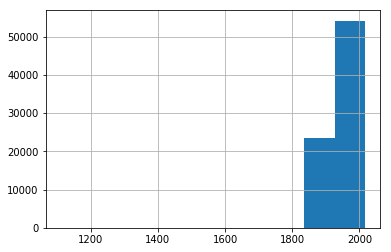

SALE PRICE


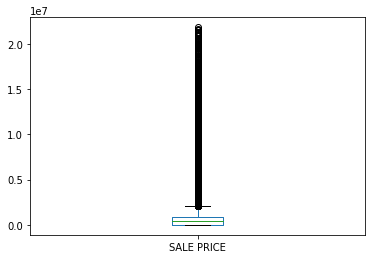

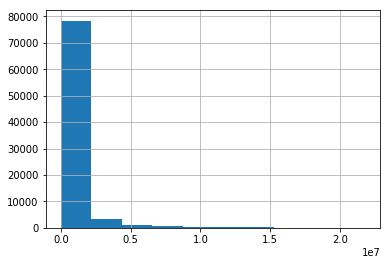

In [47]:
from scipy import stats
import numpy as np

# Lets plot two interesting charts:
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    if dtype not in ['float', 'int', 'float64', 'int64']: continue

    print(col)
    
    # Quick and dirty outlier filtering, anything over 2 std deviations from the mean is out. 
    filtered_col = sales_df[col][np.abs(stats.zscore(sales_df[col])) < 2]
    
    filtered_col.plot.box()
    plt.show()
    
    filtered_col.hist(bins=10)
    plt.show()

# Cleaning vs Preparing

What we've done above is mostly just cleaning the data. We looked for missing values, and did some spot/sanity checks on our data. We did one thing that you might consider preparing: making some columns categorical. In addition to make sure the data is clean and error free, it's common practice to prepare the data so that it plays nice with neural networks. Two common examples are centering the mean about 0, and normalize the range to be between (0 to 1) or (-1 to 1).

Why? Consider this: year built, square feet, and total units are all going to impact the sale price. One of those might be more impactful than the other, but in the end our neural network is doing a bunch of complex addition and multiplication with those values, but year is always going to be in a range between basically 1900-2017, and units are almost always between 0-50 or so. 1900, when used as a multiplicitive scalar, is going to have a bigger impact than 50. 

For this, and other reasons, it's common to normalize the data so that every datapoint is reduced to it's place within the distribution and to center that distribution between -1 and 1 or 0 and 1. Lets normalize and center all our numeric values. Note that there are other scaling choices we could make, see the reading resources for this section. 

In [52]:
from sklearn.preprocessing import MinMaxScaler
print(sales_df.columns)
scaler = MinMaxScaler()
cols_to_scale = [
    'SALE PRICE',
    'RESIDENTIAL UNITS',
    'COMMERCIAL UNITS',
    'TOTAL UNITS',
    'YEAR BUILT'
]

scaled_df = scaler.fit_transform(sales_df[cols_to_scale])

# Wow, was it really that easy?
scaled_df

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')


/Users/tylerbettilyon/.local/share/virtualenvs/deep-learning-intro-1Adgpw9A/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[2.99773756e-03, 2.71149675e-03, 0.00000000e+00, 2.21141088e-03,
        9.41993059e-01],
       [0.00000000e+00, 1.51843818e-02, 1.32684653e-03, 1.37107475e-02,
        9.41993059e-01],
       [0.00000000e+00, 8.67678959e-03, 4.42282176e-04, 7.51879699e-03,
        9.41993059e-01],
       ...,
       [2.08144796e-04, 1.08459870e-03, 0.00000000e+00, 8.84564352e-04,
        9.54387705e-01],
       [5.29110271e-03, 0.00000000e+00, 3.09597523e-03, 3.09597523e-03,
        9.92067427e-01],
       [3.13574661e-05, 0.00000000e+00, 4.42282176e-04, 4.42282176e-04,
        9.94546356e-01]])

In [ ]:
# TODO: put this into in a net
# TODO: fix the fact that sqfeet isn't numeric